In [1]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
jobs = jobs_manager()

# Сбор
## Об открытии помещений для голосования
Просто список УИКов, чтобы сверяться

In [3]:
# fetch_url(OPENED_ROOT_URL);

records0 = list(load_opened_table(OPENED_ROOT_URL))

# for record in log_progress(records0, every=1):
#     fetch_url(record.url)

records1 = []
for record in log_progress(records0, every=10):
    records1.extend(load_opened_table(record.url))

# for record in log_progress(records1, every=1):
#     fetch_url(record.url)

records2 = []
for record in log_progress(records1, every=10):
    records2.extend(load_opened_table(record.url))

# for record in log_progress(records2, every=1):
#     fetch_url(record.url)

records3 = []
for record in log_progress(records2, every=10):
    records3.extend(load_opened_table(record.url))

In [4]:
# for record in log_progress(records3, every=1):
#     fetch_url(record.url)

urls = {_.ik for _ in records3}
mapping = {_: load_regional_ik_url(_) for _ in log_progress(urls, every=10)}

In [5]:
opened = list(make_opened([records0, records1, records2, records3], mapping))

## Избирательные комиссии

In [7]:
%run -n main.py
regions = {_.ik for _ in opened if _.ik is not None}
# for region in log_progress(regions, every=1):
#     url = get_ik_tree_url(region)
#     fetch_json(url)

records0 = []
for region in regions:
    records0.extend(load_ik_tree(region))
    
records = [_ for _ in records0 if _.parent is not None]
# for record in log_progress(records, every=1):
#     url = get_ik_tree_url(record.region, record.id)
#     fetch_json(url)

records1 = []
for record in log_progress(records, every=100):
    records1.extend(load_ik_tree(record.region, id=record.id))
    
# for record in log_progress(records1, every=10):
#     url = get_ik_url(record.region, record.id)
#     fetch_url(url)

In [8]:
# ik_tree = records0 + records1
# we will use hierarchy from opened
ik_tree = records1

In [9]:
# for record in log_progress(ik_tree, every=10):
#     convert_ik(record.region, record.id)
ik_pages = [load_ik(_.region, _.id) for _ in log_progress(ik_tree, every=1000)]

In [27]:
# urls = {get_geocode_url(_.address) for _ in ik_pages}
# cache = set(list_json_cache())
# fetch_jsons(log_progress(urls - cache, every=1))

In [23]:
# %run -n main.py
address_coordinates = {}
for record in log_progress(ik_pages, every=1000):
    address = record.address
    address_coordinates[address] = load_coordinates(address)

In [35]:
for record in ik_pages:
    if record.id == 4334008231711:
        print record

In [41]:
%run -n main.py
uiks = list(make_uiks(opened, ik_tree, ik_pages, address_coordinates))

Bad ik UIK name: ИКМО 'Оспехский наслег' Усть-Алданский район


Opened UIKs: 96892
Ik UIKs: 94389
opened & ik: 94347


In [47]:
dump_uiks(uiks)
uiks = list(load_uiks())

## Сведения о кандидатах, выдвинутых по одномандатным избирательным округам

In [27]:
# for page in log_progress(range(1, ODNOMANDAT_SERPS_COUNT + 1), every=1):
#     url = get_odnomandat_serp_url(page)
#     fetch_url(url)

In [78]:
%run -n main.py
odnomandats = []
for page in log_progress(range(1, ODNOMANDAT_SERPS_COUNT + 1), every=10):
    odnomandats.extend(load_odnomandat_serp(page))

In [79]:
dump_odnomandats(odnomandats)

In [80]:
odnomandats = list(load_odnomandats())

## Предварительные итоги голосования по одномандатному избирательному округу

In [452]:
# # fetch_url(ODNOMANDAT_RESULS_ROOT_URL);

# records0 = list(load_results_tree_node(ODNOMANDAT_RESULS_ROOT_URL))

# # for record in log_progress(records0, every=1):
# #     fetch_url(record.url)

# records1 = []
# for record in log_progress(records0, every=10):
#     records1.extend(load_results_tree_node(record.url))

# # for record in log_progress(records1, every=1):
# #     fetch_url(record.url)

# records2 = []
# for record in log_progress(records1, every=10):
#     records2.extend(load_results_tree_node(record.url))

# # for record in log_progress(records2, every=1):
# #     fetch_url(record.url)

# records3 = []
# for record in log_progress(records2, every=10):
#     records3.extend(load_results_tree_node(record.url))

# for record in log_progress(records3, every=1):
#     fetch_url(record.url)

In [461]:
# raw_odnomandat_cells = []
# for record in log_progress(records3, every=1):
#     raw_odnomandat_cells.extend(load_results_table(record.url))

In [658]:
# odnomandat_cells = list(make_odnomandat_cells(uiks, odnomandats, log_progress(raw_odnomandat_cells, every=10000)))

In [659]:
# dump_odnomandat_cells(odnomandat_cells)

In [70]:
odnomandat_cells = list(load_odnomandat_cells())

# Предварительные итоги голосования по федеральному избирательному округу

In [523]:
# # fetch_url(PARTY_RESULTS_ROOT_URL);
# records0 = list(load_results_tree_node(PARTY_RESULTS_ROOT_URL))

# # for record in log_progress(records0, every=1):
# #     fetch_url(record.url)

# records1 = []
# for record in log_progress(records0, every=10):
#     records1.extend(load_results_tree_node(record.url))

# # for record in log_progress(records1, every=1):
# #     fetch_url(record.url)

# records2 = []
# for record in log_progress(records1, every=10):
#     records2.extend(load_results_tree_node(record.url))

# # for record in log_progress(records2, every=1):
# #     fetch_url(record.url)

# records3 = []
# for record in log_progress(records2, every=10):
#     records3.extend(load_results_tree_node(record.url))

# for record in log_progress(records3, every=1):
#     fetch_url(record.url)

In [661]:
# raw_party_cells = []
# for record in log_progress(records3, every=1):
#     raw_party_cells.extend(load_results_table(record.url))

In [662]:
# party_cells = list(make_party_cells(uiks, log_progress(raw_party_cells, every=10000)))

In [663]:
# dump_party_cells(party_cells)

In [74]:
party_cells = list(load_party_cells())

# Россия

In [87]:
VotesForParty = namedtuple(
    'VotesForParty',
    ['sr', 'ldpr', 'kprf', 'apple', 'er', 'other']
)
PartyResultStats = namedtuple(
    'PartyResultStats',
    ['uik_id', 'size', 'total', 'votes', 'votes_for']
)


def make_party_result_stats(party_cells):
    size_index = 1  # Число избирателей, внесенных в список избирателей на момент окончания голосования
    total_index = 2  # Число избирательных бюллетеней, полученных участковой избирательной комиссией
    votes_index = 10  # Число действительных избирательных бюллетеней
    data = defaultdict(Counter)
    for record in party_cells:
        uik_id, row_id, value = record
        if row_id in (size_index, total_index, votes_index):
            data[uik_id][row_id] = value
        elif isinstance(row_id, str):
            if row_id not in ('sr', 'ldpr', 'kprf', 'apple', 'er'):
                row_id = 'other'
            data[uik_id][row_id] += value
    for uik_id, row in data.iteritems():
        yield PartyResultStats(
            uik_id, row[size_index], row[total_index], row[votes_index],
            VotesForParty(
                row['sr'], row['ldpr'], row['kprf'], row['apple'], row['er'], row['other']
            )
        )
        
        
party_results = list(make_party_result_stats(party_cells))

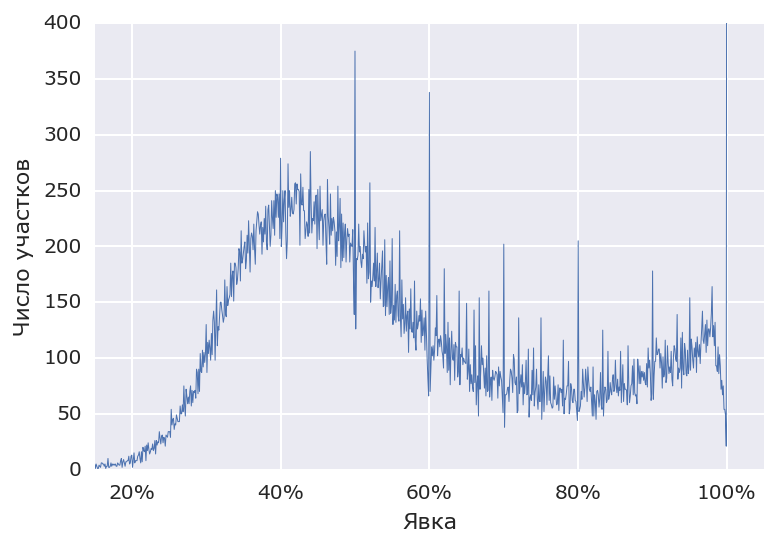

In [93]:
BLUE = '#4a71b2'
RED = '#c64d4d'
GREEN = '#52c666'
PURPLE = '#8170b4'


def show_votes_share_distribution(records):
    data = Counter()
    for record in records:
        share = float(record.votes) / record.total
        share = round(share, 3)
        data[share] += 1
    table = pd.Series(data)
    fig, ax = plt.subplots()
    ax.plot(table.index, table.values, linewidth=0.5)
    ax.set_xlim(0.15, 1.05)
    ax.set_ylim(0, 400)
    formater = mtick.FuncFormatter(
        lambda value, _: '{}%'.format(int(value * 100))
    )
    ax.xaxis.set_major_formatter(formater)
    ax.set_xlabel(u'Явка')
    ax.set_ylabel(u'Число участков')

    
show_votes_share_distribution(party_results)

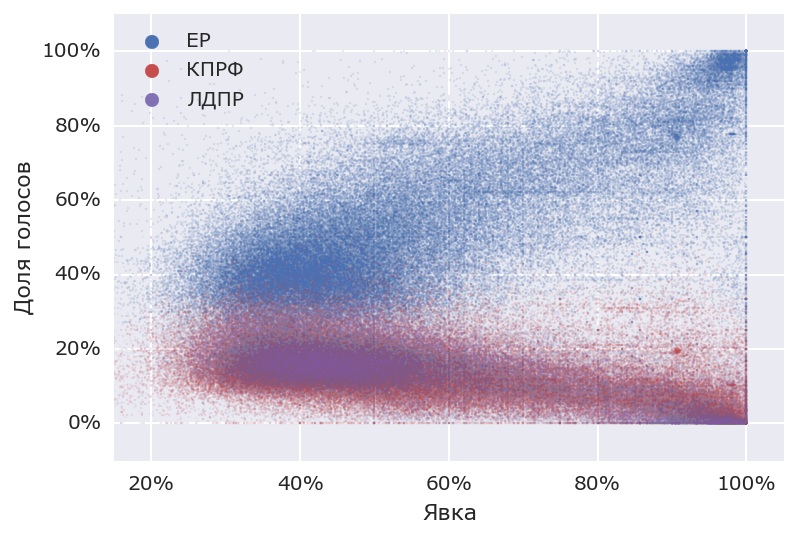

In [95]:
def show_votes_share_party_share_corellation(records):
    data = []
    for record in records:
        data.append((record.total, record.votes) + record.votes_for)
    table = pd.DataFrame(
        data,
        columns=['total', 'votes', 'sr', 'ldpr', 'kprf', 'apple', 'er', 'other']
    )
    share = table.votes / table.total
    er = table.er / table.votes
    kprf = table.kprf / table.votes
    ldpr = table.ldpr / table.votes
    apple = table.apple / table.votes
    fig, ax = plt.subplots()
    ax.scatter(share, er, color=BLUE, s=1, alpha=0.1)
    ax.scatter(share, kprf, color=RED, s=1, alpha=0.1)
    ax.scatter(share, ldpr, color=PURPLE, s=1, alpha=0.05)
    # look bad
    # ax.scatter(share, apple, color=GREEN, s=1, alpha=0.05)
    ax.scatter([], [], color=BLUE, label=u'ЕР')
    ax.scatter([], [], color=RED, label=u'КПРФ')
    ax.scatter([], [], color=PURPLE, label=u'ЛДПР')
    # ax.scatter([], [], color=GREEN, label=u'Яблоко')
    ax.set_xlim(0.15, 1.05)
    ax.set_ylim(-0.1, 1.1)
    formater = mtick.FuncFormatter(
        lambda value, _: '{}%'.format(int(value * 100))
    )
    ax.xaxis.set_major_formatter(formater)
    ax.yaxis.set_major_formatter(formater)
    ax.set_xlabel(u'Явка')
    ax.set_ylabel(u'Доля голосов')
    ax.legend(loc='upper left', markerscale=1.5)
    
    
show_votes_share_party_share_corellation(party_results)

In [98]:
MAP_DATA = 'map.csv'

def dump_map_data(stats, uiks):
    mapping = {_.id: _ for _ in uiks}
    data = []
    for record in stats:
        uik = mapping[record.uik_id]
        if uik.address and uik.coordinates:
            coordinates = uik.coordinates
            votes = record.votes
            if votes:
                total = record.total
                share = float(votes) / total
                votes_for = record.votes_for
                er = float(votes_for.er) / votes
                kprf = float(votes_for.kprf) / votes
                ldpr = float(votes_for.ldpr) / votes
                sr = float(votes_for.sr) / votes
                apple = float(votes_for.apple) / votes
                other = float(votes_for.other) / votes
                data.append((
                    uik.region_id, coordinates.longitude, coordinates.latitude,
                    total, votes, share, er, kprf, ldpr, apple, sr, other
                ))
    table = pd.DataFrame(
        data,
        columns=['region', 'longitude', 'latitude',
                 'total', 'votes', 'share', 'er', 'kprf', 'ldpr', 'apple', 'sr', 'other']
    )
    table.to_csv(MAP_DATA, index=False)
    
    
dump_map_data(party_results, uiks)